<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Distribution

<ipython-input-15-bb0da41316f6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


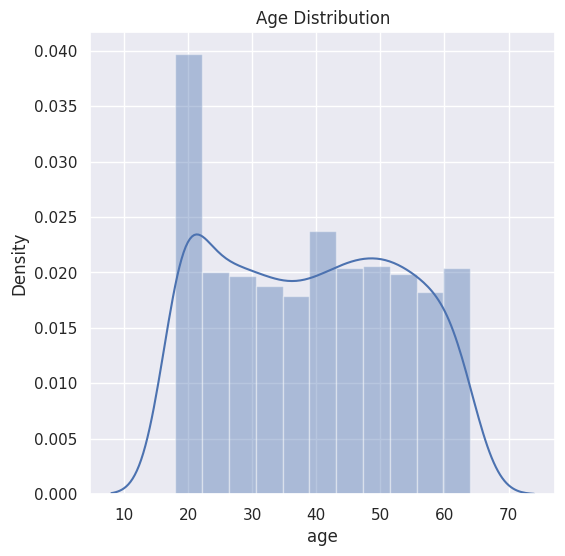

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()


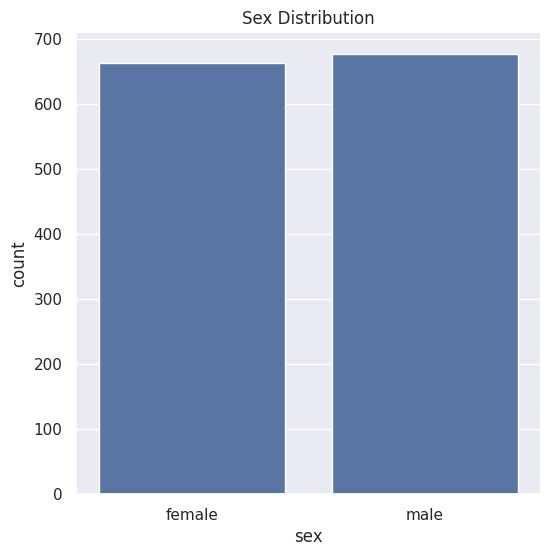

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("Sex Distribution")
plt.show()

In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-18-a046d3327477>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


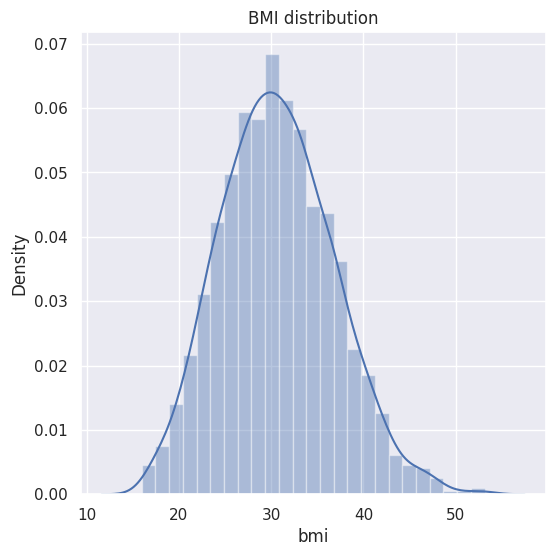

In [ ]:
plt.figure(figsize = (6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

In [ ]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

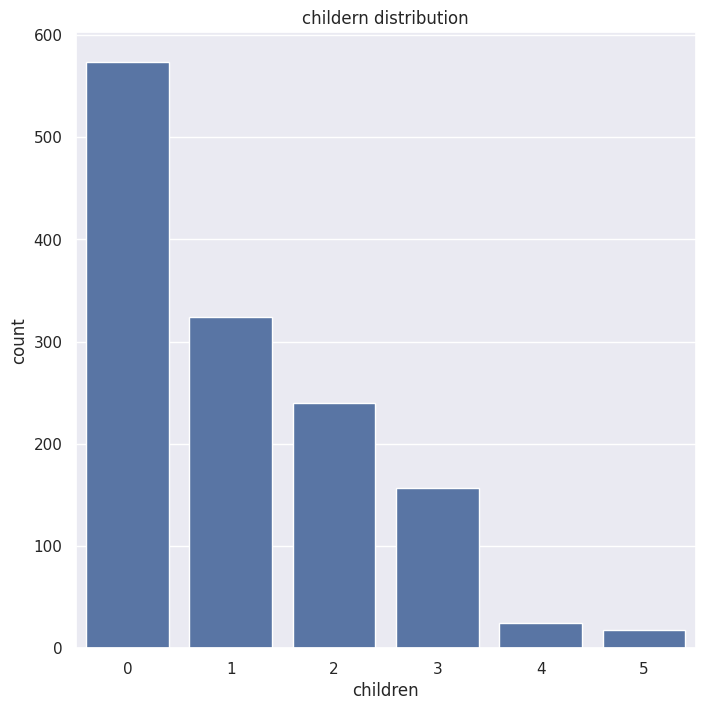

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='children' ,data=df)
plt.title("childern distribution")
plt.show()

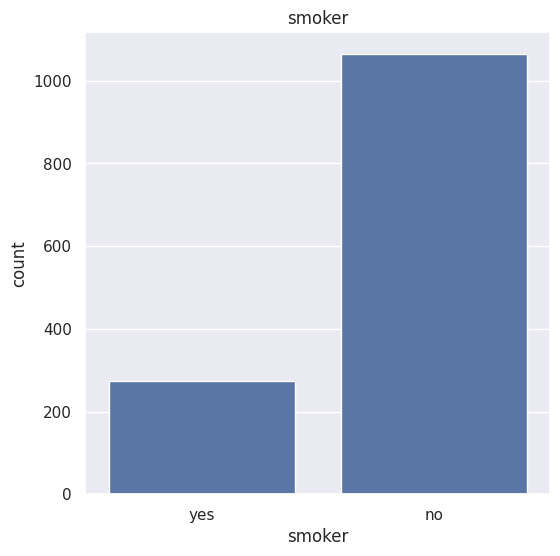

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='smoker',data=df)
plt.title("smoker")
plt.show()

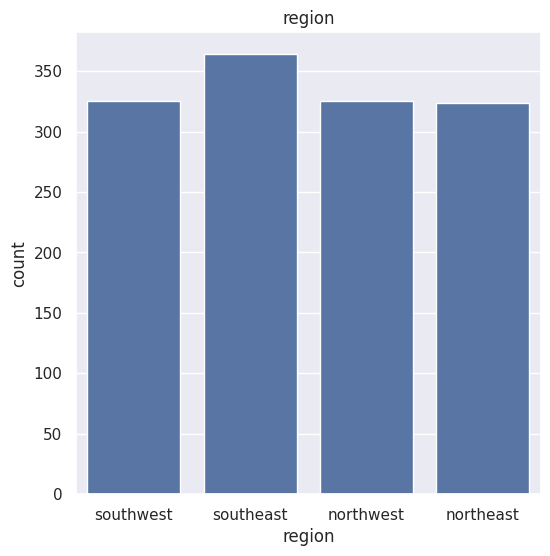

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title("region")
plt.show()

In [ ]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-24-7c9e1e1be88c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


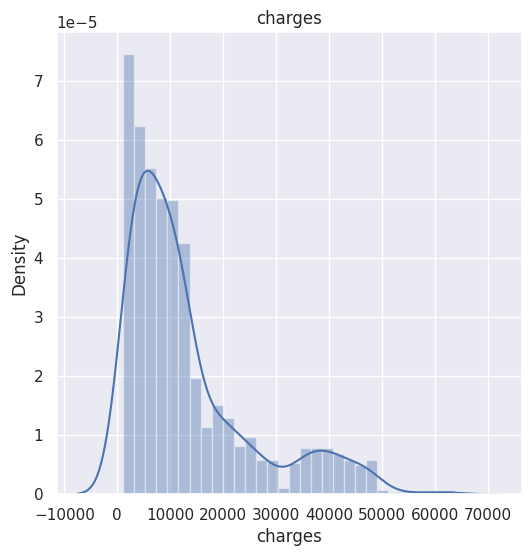

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charges")
plt.show()

# Data PreProcessing

Encoding the categorical features (converting string values from dataset into numerical values).


In [ ]:
#Encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding smoker
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding region
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Correlation between 2 variables

In [ ]:
from numpy import cov
covar = cov(df['age'],df['sex'])
covar

array([[1.97401387e+02, 1.46558847e-01],
       [1.46558847e-01, 2.50159595e-01]])

In [ ]:
correlation = df.corr()
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


<Axes: >

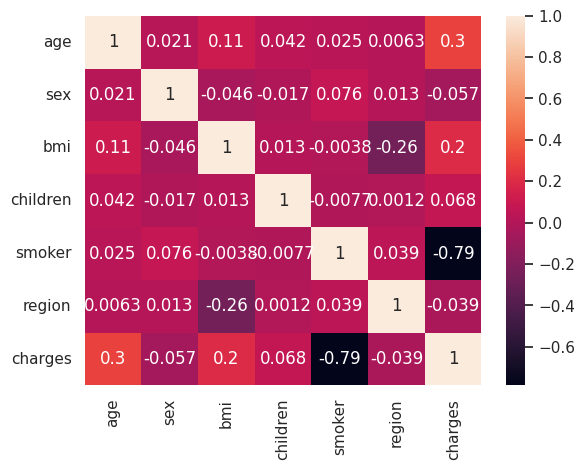

In [ ]:
import seaborn as sns
sns.heatmap(correlation, annot = True)

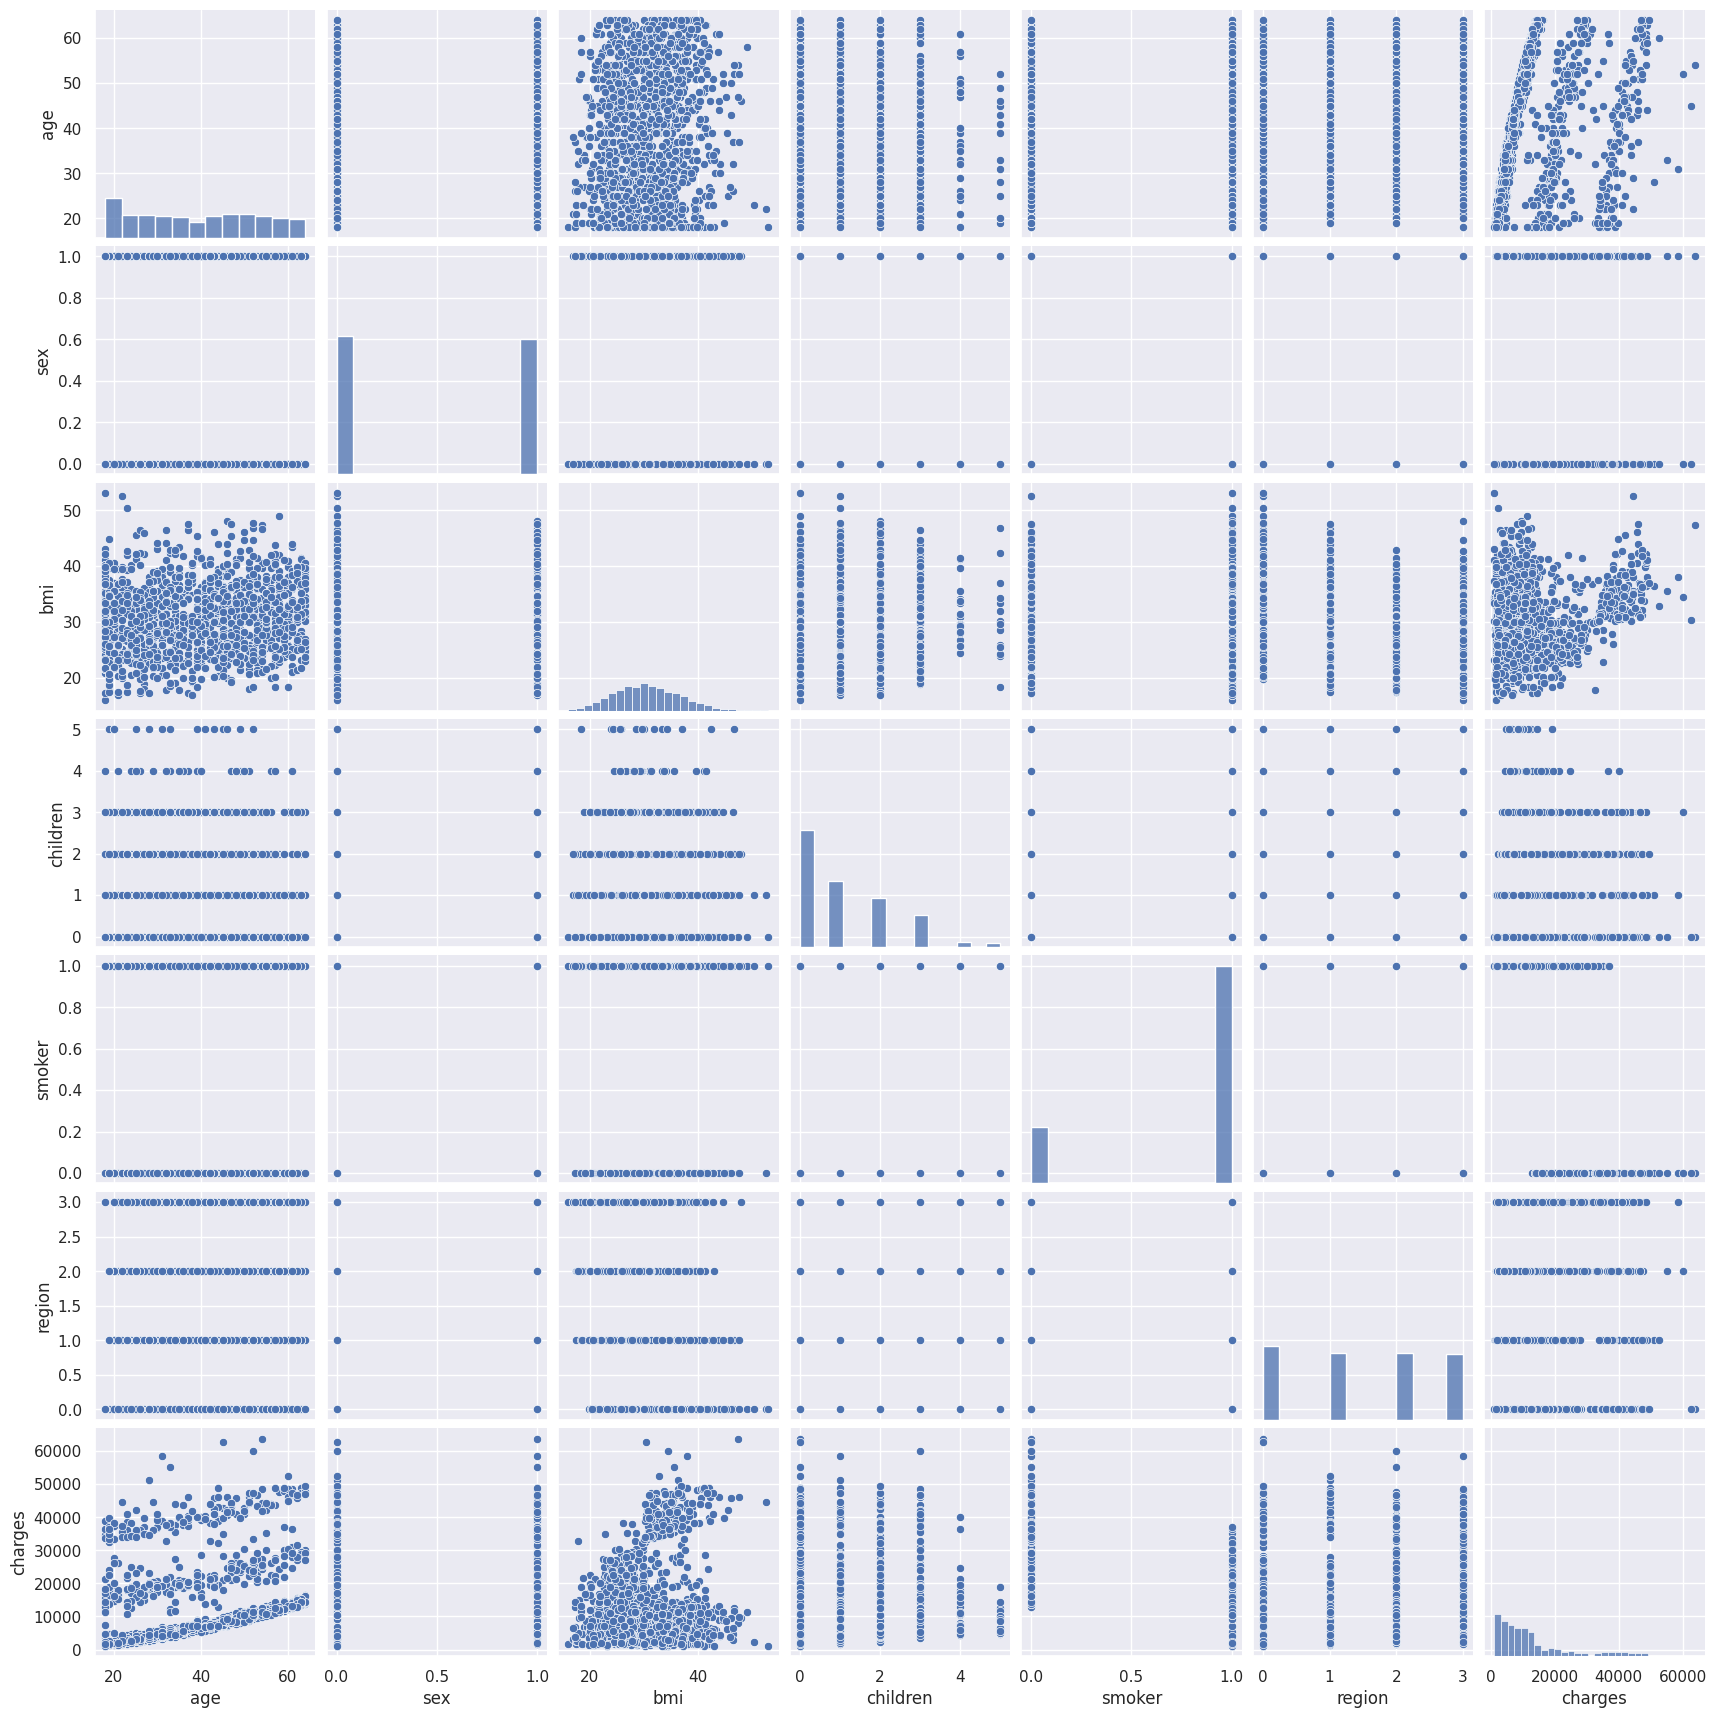

In [ ]:
sns.pairplot(df)

# Spliting features and target

In [ ]:
X = df.drop(["charges"],axis=1)
y = df["charges"]

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Training Testing The Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("shape of X_train : ",X_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of y_train : ",y_train.shape)
print("shape of y_test : ",y_test.shape)

shape of X_train :  (1070, 6)
shape of X_test :  (268, 6)
shape of y_train :  (1070,)
shape of y_test :  (268,)


# Model Training (Linear regression)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
model.intercept_

10850.952562595043

In [ ]:
model.coef_

array([ 2.56600616e+02,  1.85353207e+01,  3.39184210e+02,  4.23674513e+02,
       -2.36702619e+04,  2.41362103e+02])

# Making Predictions

In [ ]:
train_data_prediction = model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, train_data_prediction)
print("r2 value for train data : ",r2_score_train)

r2 value for train data :  0.7415700001111735


In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test, test_data_prediction)
print("r2 value for test data : ",r2_score_test)

r2 value for test data :  0.783927977646397


# Building predictive system

In [ ]:
input_x = (31,1,25.74,0,1,0)
input_x_as_numpy_array = np.asarray(input_x)

input_x_reshaped = input_x_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_x_reshaped)
print("prediction for given data is : ",prediction[0])

prediction for given data is :  3884.446655038135


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
